In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

TIC = 'TIC 381789320'

In [2]:
search_ffi = lk.search_tesscut(TIC)

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 13,2019,TESScut,1426,TIC 381789320,0.0
1,TESS Sector 39,2021,TESScut,475,TIC 381789320,0.0


In [4]:
search_tpf = lk.search_targetpixelfile(TIC)

In [5]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 13,2019,TESS-SPOC,1800,381789320,0.0


In [6]:
search_lcf = lk.search_lightcurve(TIC)

In [7]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 13,2019,TESS-SPOC,1800,381789320,0.0
1,TESS Sector 13,2019,QLP,1800,381789320,0.0
2,TESS Sector 39,2021,QLP,600,381789320,0.0


In [8]:
search_lcf_refined = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=1800)

In [9]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 13,2019,TESS-SPOC,1800,381789320,0.0


In [10]:
lcf = search_lcf_refined.download_all()

In [11]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 381789320" SECTOR=13 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [12]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1653.953437398206,———,———,5.0783213e-03,20471,439.96408,48.43449,2.0326213e+03,4.4771552e+00,1.7973289e+04,2.1602807e+00,———,———,11000000000000,———,———,———,———,439.96408,1.5958282e-03,48.43449,9.9579594e-04,2.3581583e-02,-8.8201411e-02
1653.9742707026346,———,———,5.0783013e-03,20472,439.96339,48.43468,2.0389023e+03,4.3582177e+00,1.6915154e+04,2.0983450e+00,———,———,11000000000000,———,———,———,———,439.96339,1.5485040e-03,48.43468,9.6672087e-04,2.1262817e-02,-8.8934816e-02
1653.9951040042686,———,———,5.0782785e-03,20473,439.96032,48.43467,2.0385621e+03,4.4520884e+00,1.7752707e+04,2.1477785e+00,———,———,11000000000000,———,———,———,———,439.96032,1.5823578e-03,48.43467,9.8731730e-04,1.9826483e-02,-8.9172125e-02
1654.015937304506,———,———,5.0782543e-03,20474,439.96558,48.43714,2.0215919e+03,4.3918228e+00,1.7244818e+04,2.1155617e+00,———,———,11000000000000,———,———,———,———,439.96558,1.5737743e-03,48.43714,9.8194717e-04,1.7373905e-02,-9.1561601e-02
1654.0367706028817,———,———,5.0782282e-03,20475,439.96763,48.43675,2.0093293e+03,4.2218924e+00,1.5779515e+04,2.0276716e+00,———,———,11000000000000,———,———,———,———,439.96763,1.5211094e-03,48.43675,9.5035438e-04,1.5752498e-02,-9.2693314e-02
1654.057603899859,———,———,5.0782007e-03,20476,439.96420,48.43388,2.0210817e+03,3.9804726e+00,1.3799673e+04,1.9014797e+00,———,———,11000000000000,———,———,———,———,439.96420,1.4253313e-03,48.43388,8.9225918e-04,1.3628333e-02,-9.3912862e-02
1654.0784371949742,———,———,5.0781714e-03,20477,439.96166,48.43381,2.0180090e+03,3.9620602e+00,1.3658380e+04,1.8920295e+00,———,———,11000000000000,———,———,———,———,439.96166,1.4209998e-03,48.43381,8.8953529e-04,1.1848672e-02,-9.4930299e-02
1654.0992704896237,———,———,5.0781416e-03,20478,439.96223,48.43433,2.0220441e+03,3.8793914e+00,1.3015930e+04,1.8485811e+00,———,———,11000000000000,———,———,———,———,439.96223,1.3885772e-03,48.43433,8.6952420e-04,1.0544965e-02,-9.8636523e-02


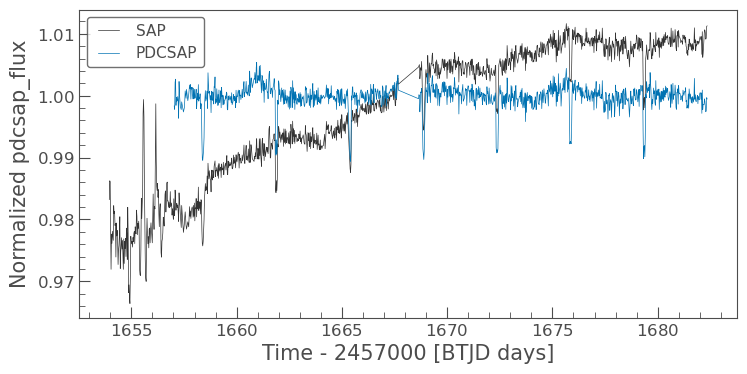

In [13]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 842133310')

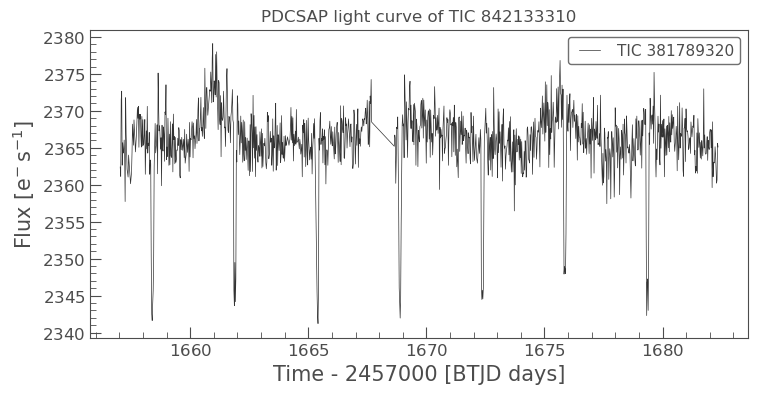

In [14]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 381789320")

In [15]:
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=3.495302953029530535)
binned_lc = folded_lc.bin(time_bin_size=0.01)

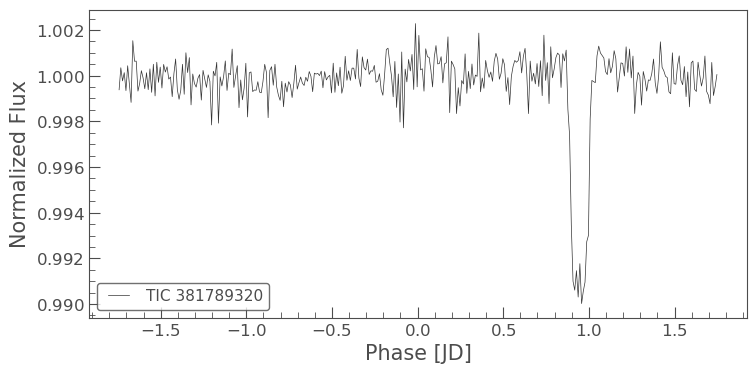

In [16]:
lcf[0].flatten(window_length=401).fold(period=3.495302953029530535).bin(time_bin_size=0.01).plot();

In [17]:
lcf[0].interact_bls()

In [18]:
ffi_data = search_ffi[1].download(cutout_size=20)

<AxesSubplot:title={'center':'Target ID: TIC 381789320, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

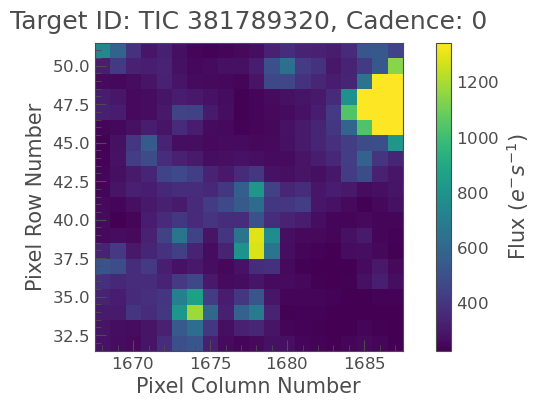

In [19]:
ffi_data.plot()

In [20]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

10

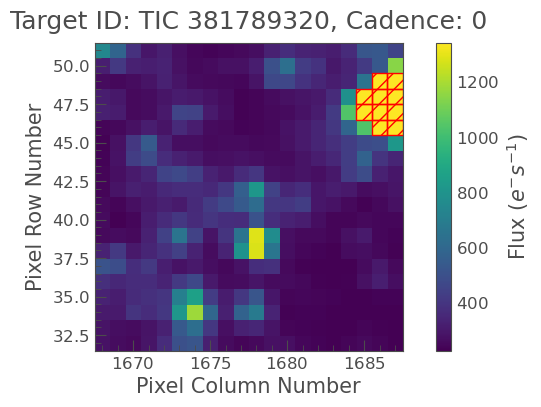

In [21]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [22]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [23]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2361.779429018531,272288.0,24.6966552734375,1686.7032314833582,47.35988007506356,0,2048
2361.786373659118,272439.1875,24.703428268432617,1686.702794871496,47.3594725033032,1,2048
2361.793318299704,272542.71875,24.70747184753418,1686.7027843585186,47.3594391187471,2,2048
2361.8002629398243,272387.8125,24.700851440429688,1686.7029254141758,47.35921849742325,3,2048
2361.807207579944,272740.0,24.716434478759766,1686.7027047261558,47.361832897423774,4,2048
2361.814152220065,272736.71875,24.716333389282227,1686.7028339970582,47.36176112064348,5,2048
2361.82109685972,272743.4375,24.716453552246094,1686.7026054848936,47.362669441698586,6,2048
2361.828041499374,272726.1875,24.715923309326172,1686.702587004044,47.36277141121997,7,2048


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

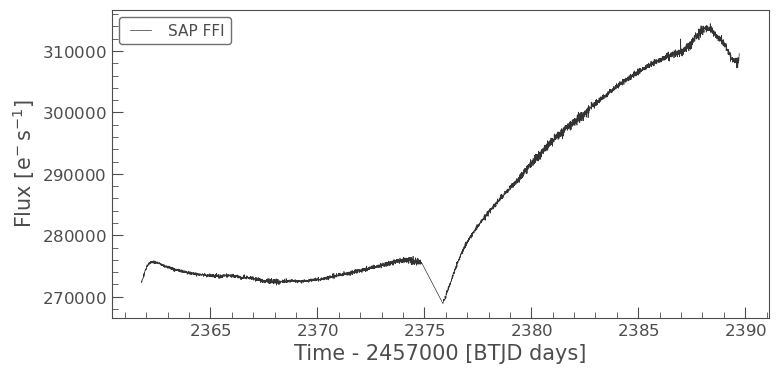

In [24]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

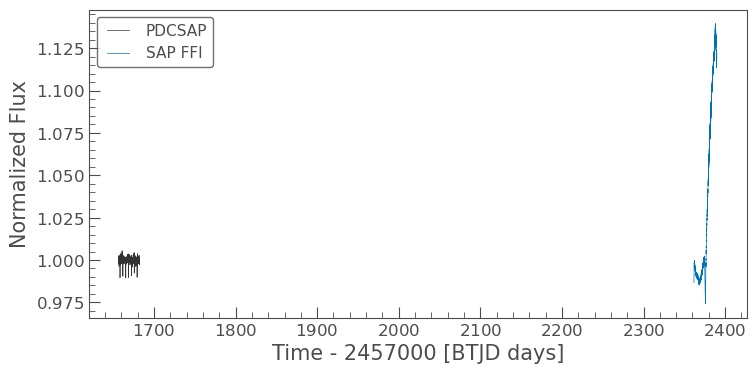

In [25]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [26]:
ffi_data.interact()
ffi_data.interact_sky()

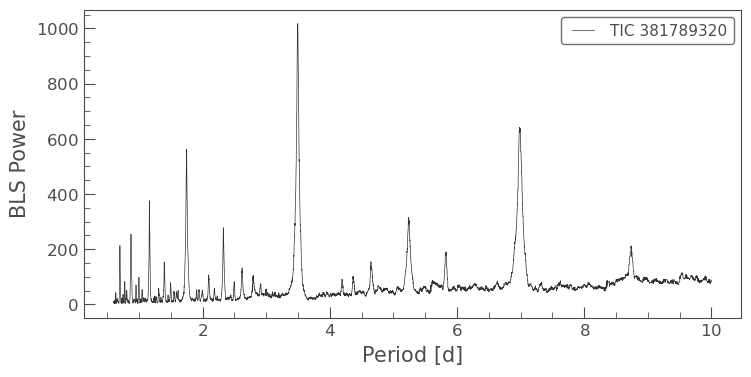

In [27]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [28]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 3.495 d


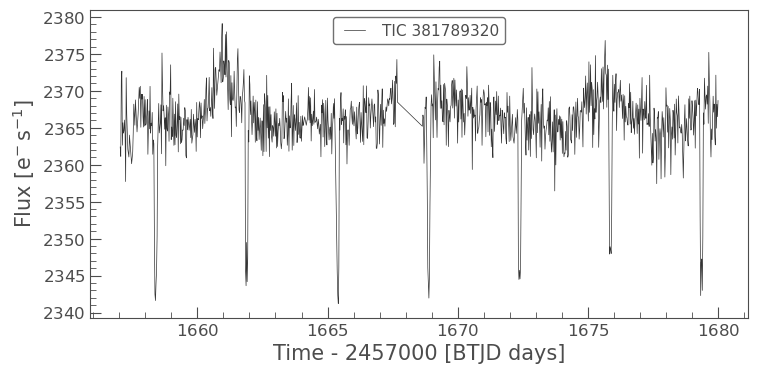

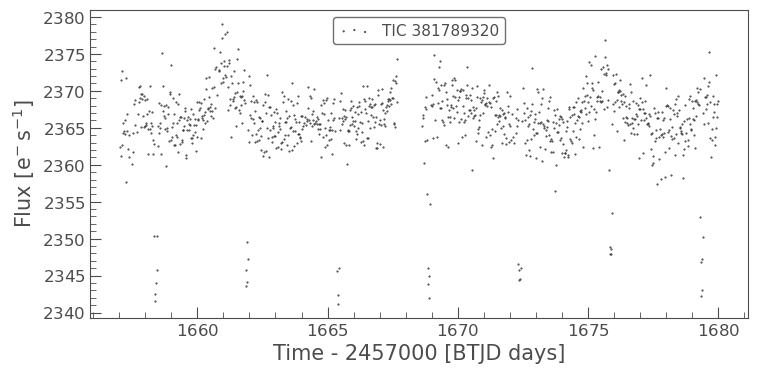

In [47]:
mask = ((lcf[0].time.value < 1680)&(lcf[0].time.value > 1655))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [48]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 1024.551015)

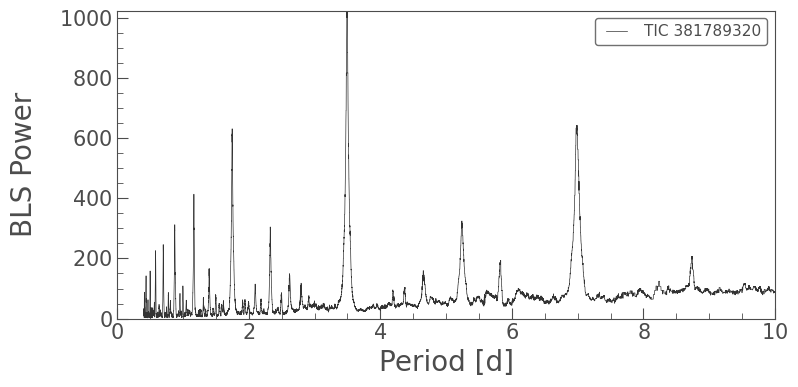

In [49]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 10)
plt.ylim([0, 1024.551015])

In [50]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [51]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 3.495302953029530535 d
BLS max power = 1032.590705
Epoch max power = 2458658.396765
----------------------------------------
Period at 2th max power = 3.495006950069500906 d
BLS max power = 1026.934273
Epoch max power = 2458658.396765
----------------------------------------
Period at 3th max power = 3.495598955989560164 d
BLS max power = 1026.934273
Epoch max power = 2458658.391765
----------------------------------------
Period at 4th max power = 3.496190961909619421 d
BLS max power = 1026.934273
Epoch max power = 2458658.391765
----------------------------------------
Period at 5th max power = 3.494710947109471721 d
BLS max power = 1026.934273
Epoch max power = 2458658.396765
----------------------------------------
Period at 6th max power = 3.495894958949589792 d
BLS max power = 1026.934273
Epoch max power = 2458658.391765
----------------------------------------
Period at 7th max power = 3.494118941189412020 d
BLS max power = 1026.934273
Epoch max power =

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(2300.0, 2425.0)

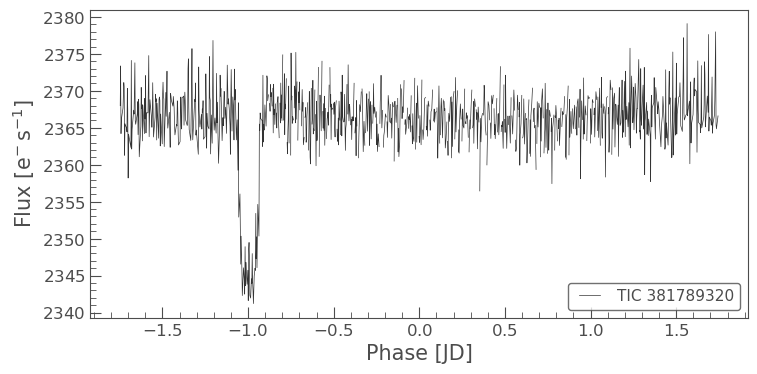

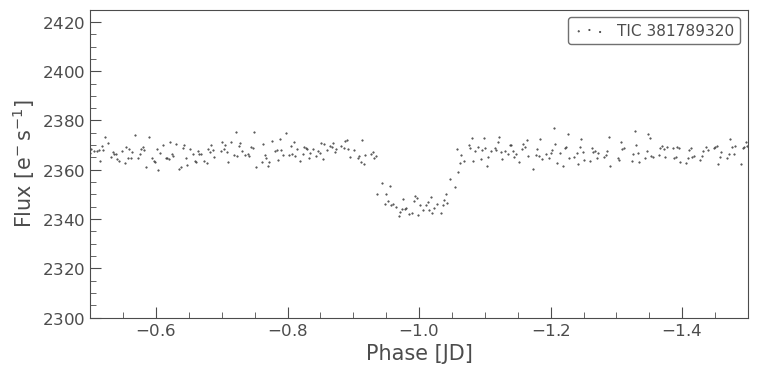

In [52]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 3.495302953029530535
epochtime = 2459367.680167
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.5,-1.5)
plt.ylim([2300,2425])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(2300.0, 2425.0)

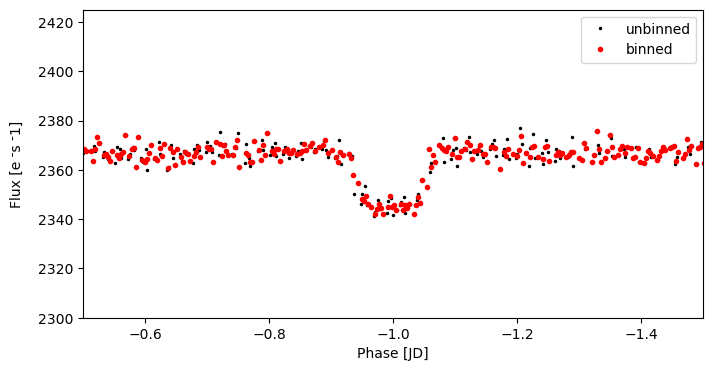

In [53]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.5,-1.5)
plt.ylim([2300,2425])

In [54]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  2341.95556640625 electron / s
median flux = 2366.463623046875 electron / s
Tdepth =  24.508056640625 electron / s
Tdepth in ppm =  24508056.640625 electron / s ppm
Rp/Rs ratio =  4.950561245013034 electron(1/2) / s(1/2)


In [55]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [56]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 2.4000000000000004 d hours


In [57]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  20.671356317672636 electron / s
depth in ppm = 20671356.317672636 electron / s ppm


In [58]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

3.4953029530295305 d
1658.396765108771
0.1 d


In [59]:
P = 3.495302953029530535 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.1 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 6960574864.635284 m
a = 6960574.864635284 km
a = 0.04652856825266778 AU
The planetary mass was neglected


In [60]:
L = 2.344768 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 1.4600024906579003 AU
The outer boundary of the habitable zone ro = 2.103352221107472 AU


In [61]:
Rs = 1.42374 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 4908021.624717273 electron(1/2) / s(1/2) km
Rp= 770.3691139094761 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 7.0209047153210715


In [62]:
P = 3.495302953029530535 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 112118.50610355267 m/s


In [63]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  3.4953029530295305 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  2.4000000000000004 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  24.508056640625 electron / s
Transit depth in ppm =  24508056.640625 electron / s ppm
Transit Depth from bls model in ppm = 20671356.317672636 electron / s ppm
Rp/Rs ratio =  4.950561245013034 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 4908021.624717273 electron(1/2) / s(1/2) km
Rp= 770.3691139094761 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 7.0209047153210715
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 112118.50610355267 m/s
- - - - - - - - - - - - - - - - - - - - 


In [64]:
lk.show_citation_instructions()